In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import lsst.daf.persistence as daf_persistence
import lsst.afw.geom as afwGeom
from lsst.afw.geom import Angle
import lsst.geom

In [2]:
from python.notebook_utils import look, SimMatcher, find_location
from python.notebook_utils import plot_spectrum, plot_quasar_spectrum, plot_color, plot_quasar_color
from python.simulation_utils import simulation_wrapper

In [3]:
seed = 7
n_star = 1
n_quasar = 0
sim = simulation_wrapper(seed=seed, n_star=n_star, n_quasar=n_quasar, output_directory=None,
                         write_catalog=False, write_fits=False, do_simulate=False)

Number and flux contribution of stars of each type:
 [M 1| 100.00%] [K 0| 0.00%] [G 0| 0.00%] [F 0| 0.00%] [A 0| 0.00%] [B 0| 0.00%] [O 0| 0.00%]


<IPython.core.display.Javascript object>


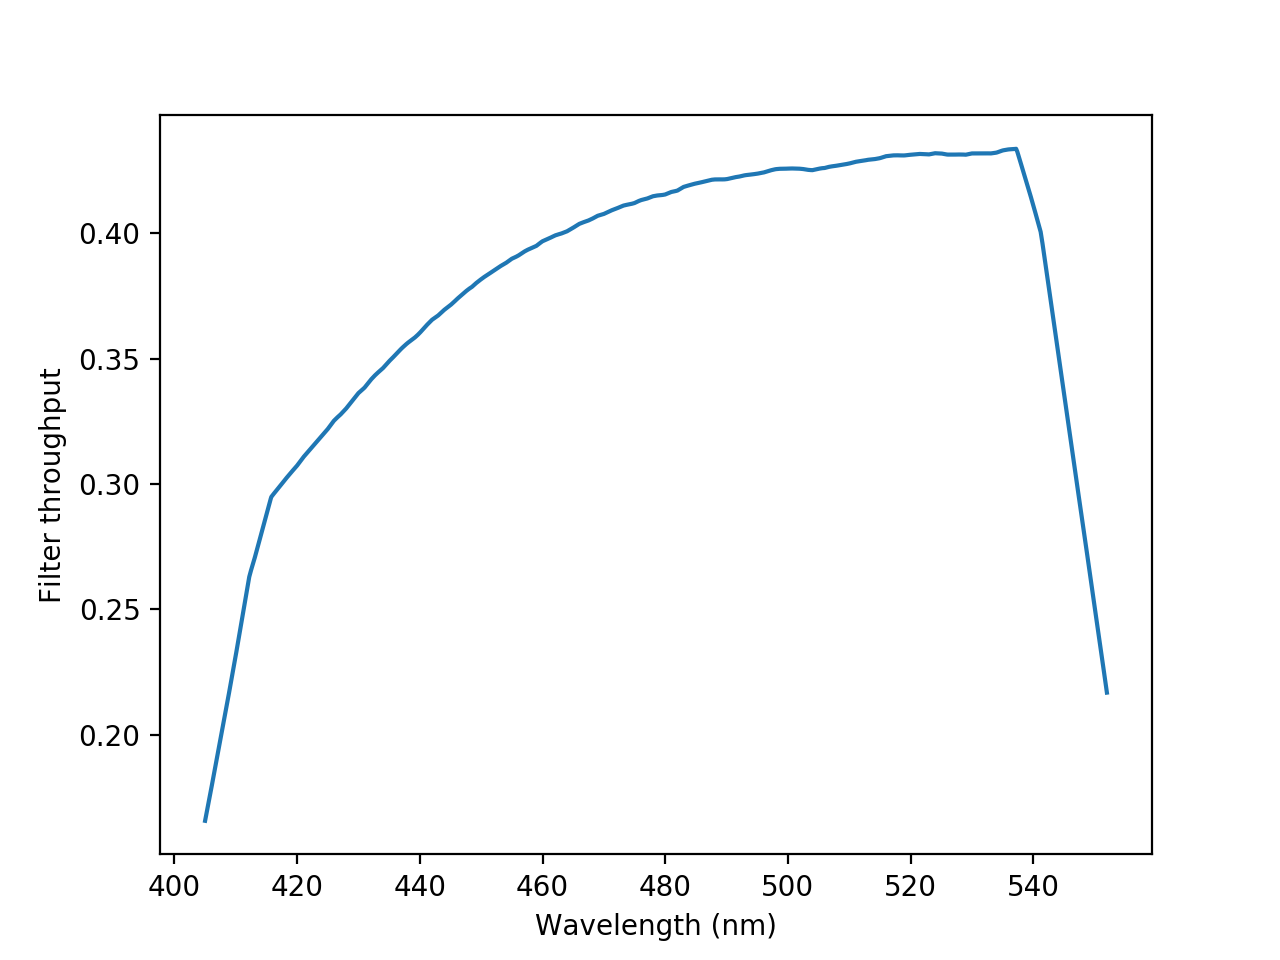

Text(0,0.5,'Filter throughput')

In [4]:
sim_bp = sim.bandpass_highres.getBandpass()
plot_1 = afwDisplay.Display(1)
plt.plot(sim_bp[0], sim_bp[1],)
    
plt.xlabel('Wavelength (nm)')
plt.ylabel('Filter throughput')

Load measurements from the DCR model

In [5]:
numDcrSubfilters = 3

In [6]:
repository = '/Users/sullivan/LSST/DATA/Decam/Blind15A_03_repo/rerun/processed_data/rerun/f%i_new_reg/' % numDcrSubfilters

Load the measurements from forced photometry

In [7]:
butler_Cat = daf_persistence.Butler(repository)

In [8]:
templateCoadd = butler_Cat.get("deepCoadd",dataId={'tract':0,'patch':'4,4','filter':'g'})

In [9]:
filterInfo = templateCoadd.getFilter()

<IPython.core.display.Javascript object>


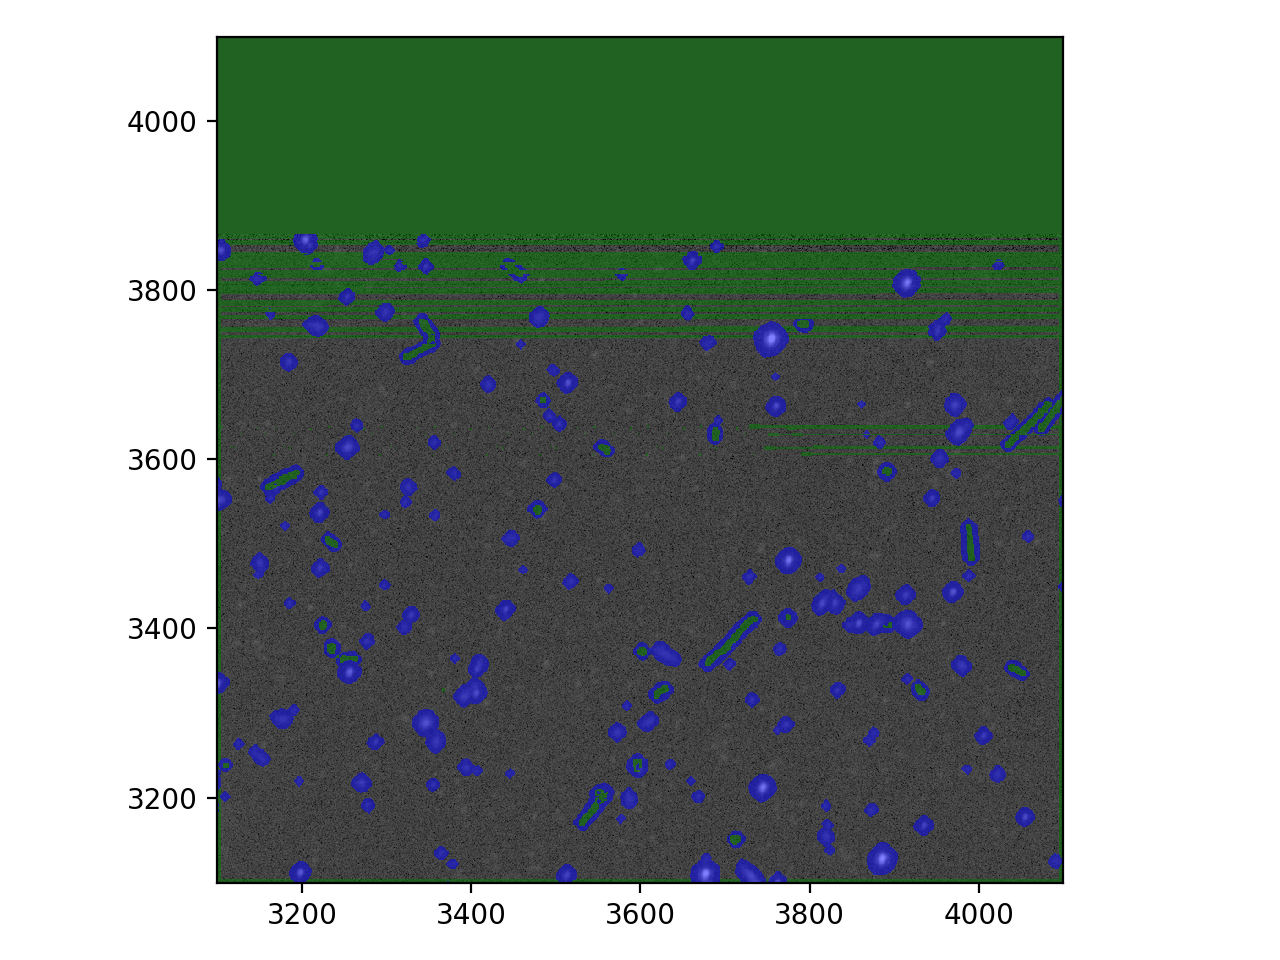

In [10]:
disp1 = afwDisplay.Display(2)
disp1.setMaskTransparency(50)
disp1.scale('asinh', 'zscale', Q=8)
disp1.mtv(templateCoadd)

In [11]:
meas_cats = [butler_Cat.get("dcrCoadd_meas",dataId={'tract':0,'patch':'4,4','filter':'g', 'subfilter':_s, 'numSubfilters':numDcrSubfilters})
            for _s in range(numDcrSubfilters)]

In [12]:
dcrCoadds = [butler_Cat.get("dcrCoadd",dataId={'tract':0,'patch':'4,4','filter':'g', 'subfilter':_s, 'numSubfilters':numDcrSubfilters})
            for _s in range(numDcrSubfilters)]

In [13]:
psf_flux_slot = meas_cats[0].getPsfFluxSlot()
isFlagged = meas_cats[0][psf_flux_slot.getFlagKey()]
for f in range(numDcrSubfilters):
    meas_cats[f] = (meas_cats[f][~isFlagged]).copy(True)

In [28]:
len(meas_cats[0])

433

meas coordinates: 137.991526, -1.367887
meas x,y: 3935.348869, 3168.230612
[38.40800914 38.45091057 24.55451191]


<IPython.core.display.Javascript object>


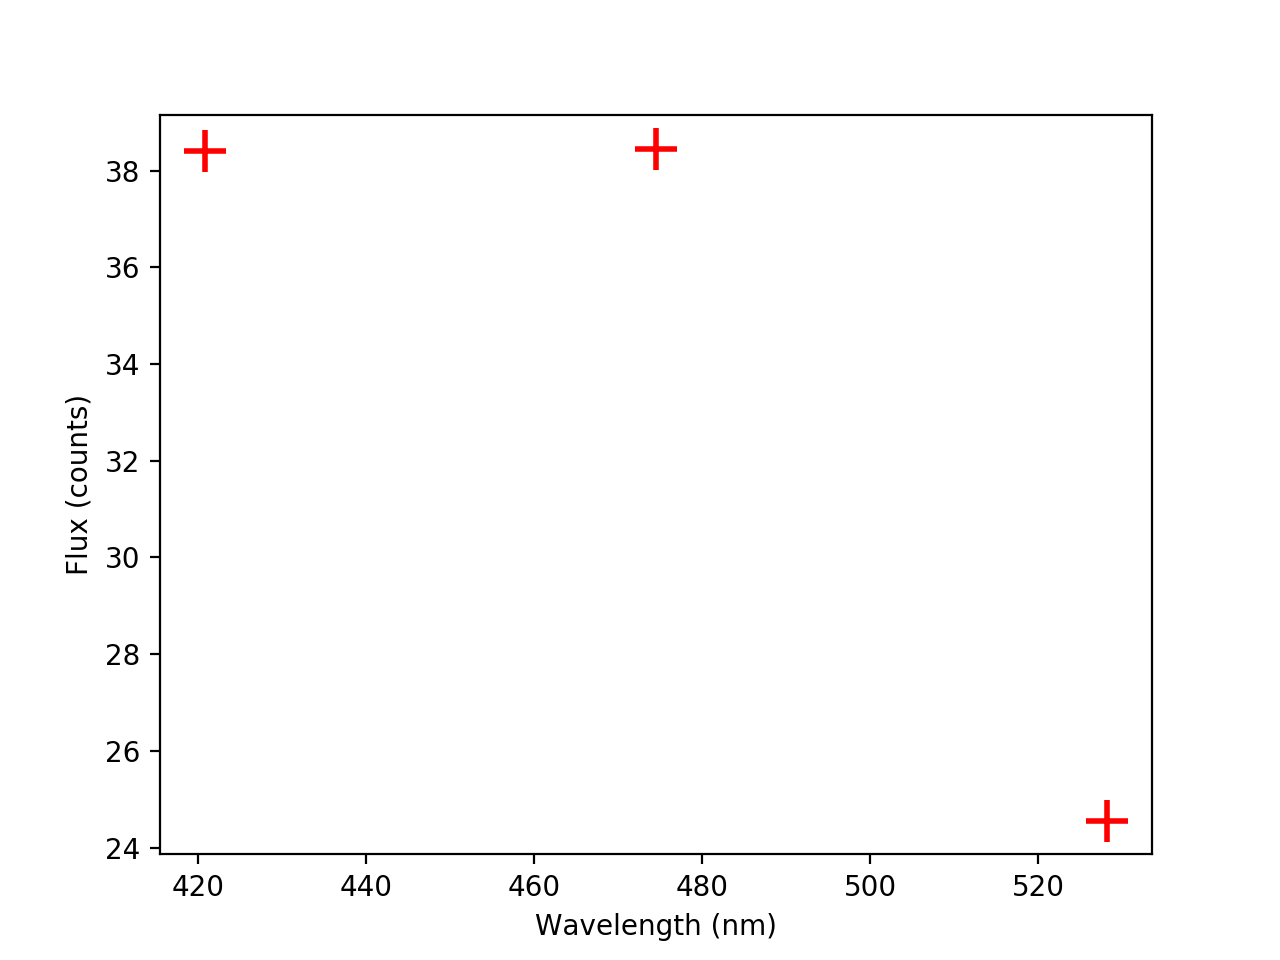

<IPython.core.display.Javascript object>


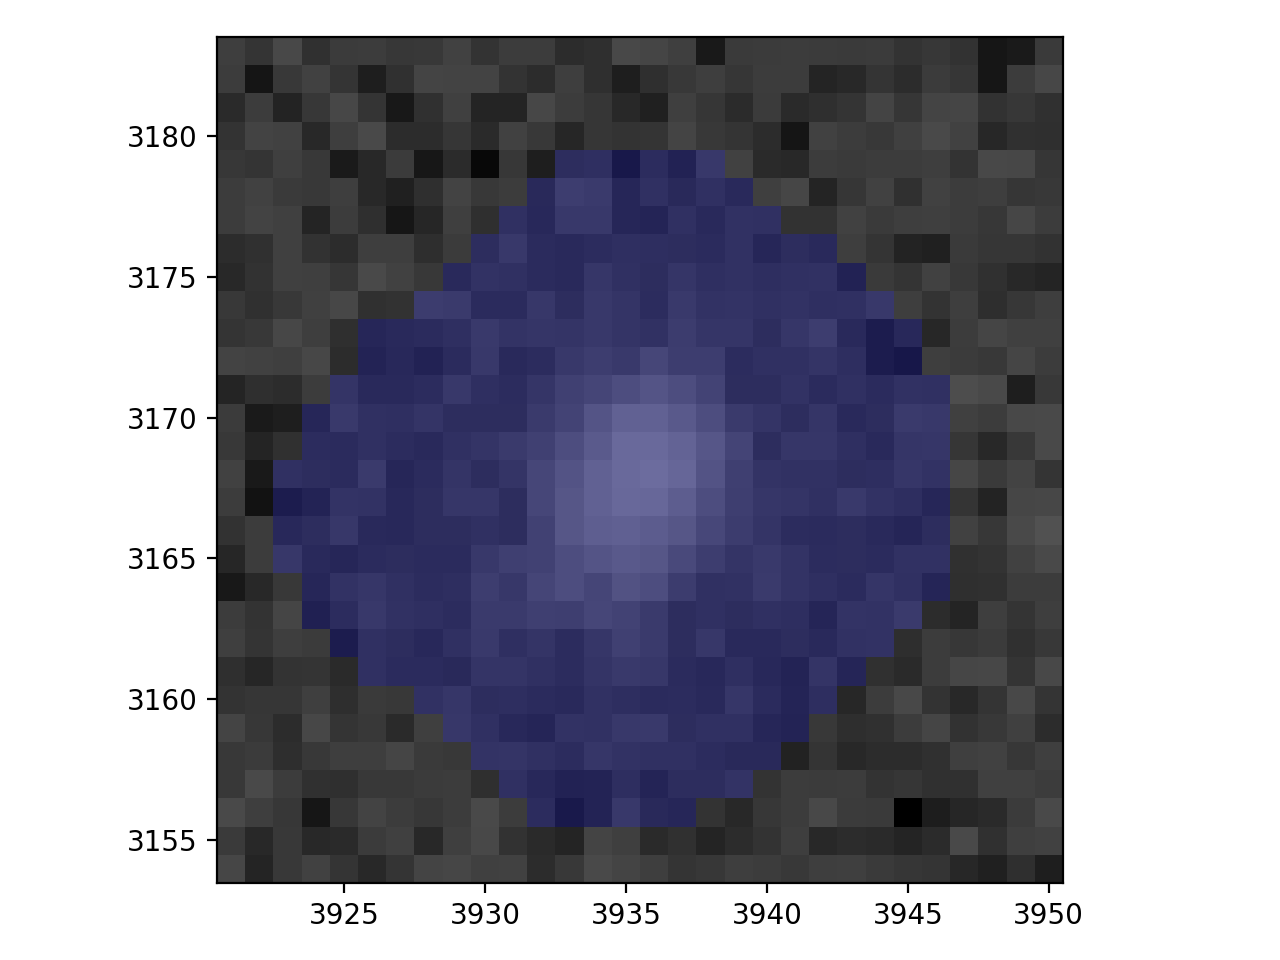

In [14]:
ind = 8
plot_spectrum(sim, filterInfo, meas_cats, ind, use_throughput=False, window=3)
ra = meas_cats[0][ind].getCoord().getLongitude().asDegrees()
dec = meas_cats[0][ind].getCoord().getLatitude().asDegrees()
centerSource = lsst.geom.SpherePoint(ra, dec, lsst.geom.degrees)
size = lsst.geom.Extent2I(30, 30)
cutout = templateCoadd.getCutout(centerSource, size)
disp1 = afwDisplay.Display(4)
disp1.setMaskTransparency(80)
disp1.scale('asinh', 'zscale', Q=8)
disp1.mtv(cutout)

meas coordinates: 138.025871, -1.350174
meas x,y: 3440.924357, 3423.315651
[35.02936874 39.41046209 29.31384048]


<IPython.core.display.Javascript object>


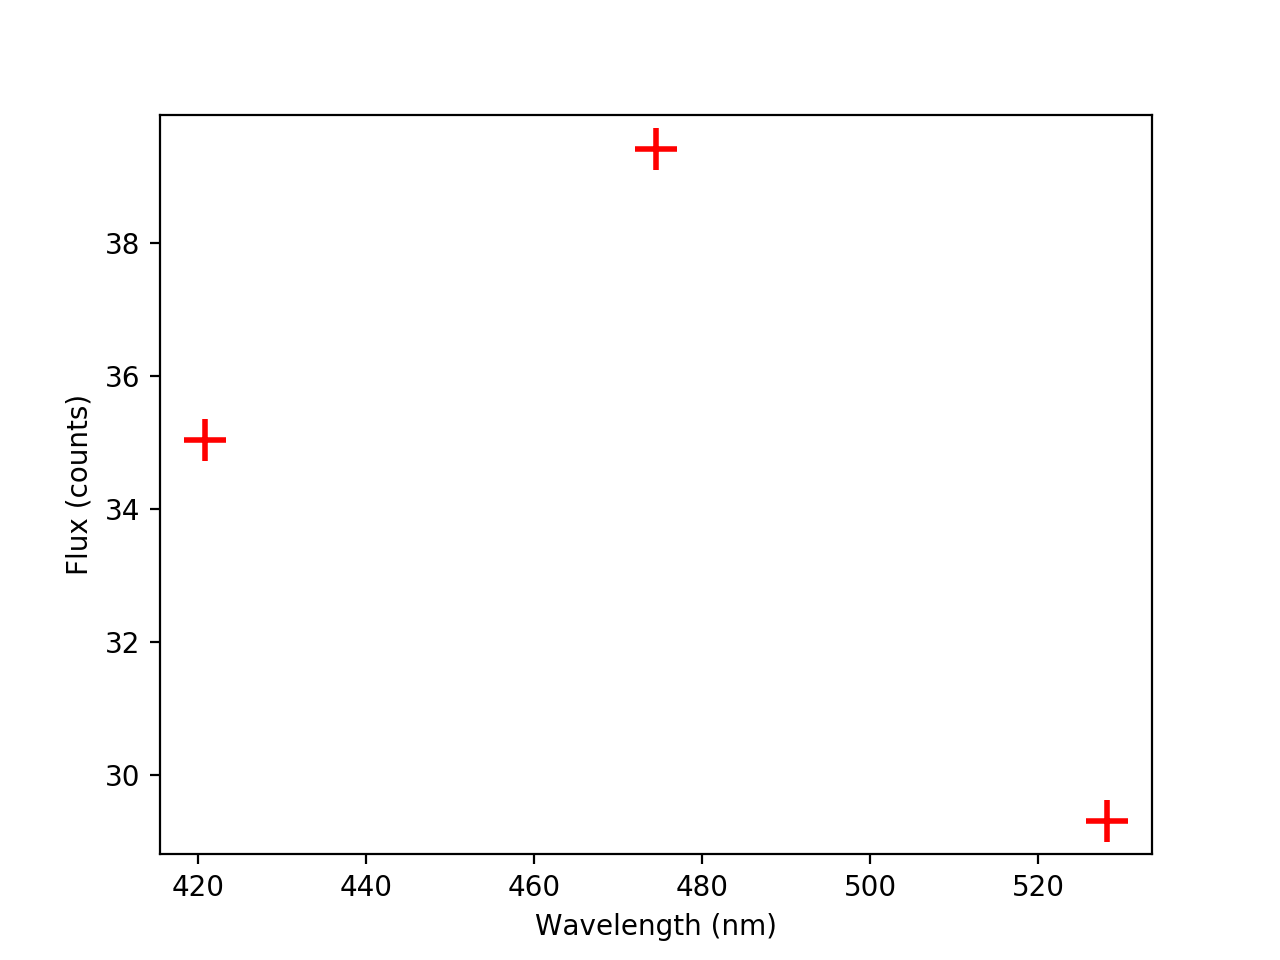

<IPython.core.display.Javascript object>


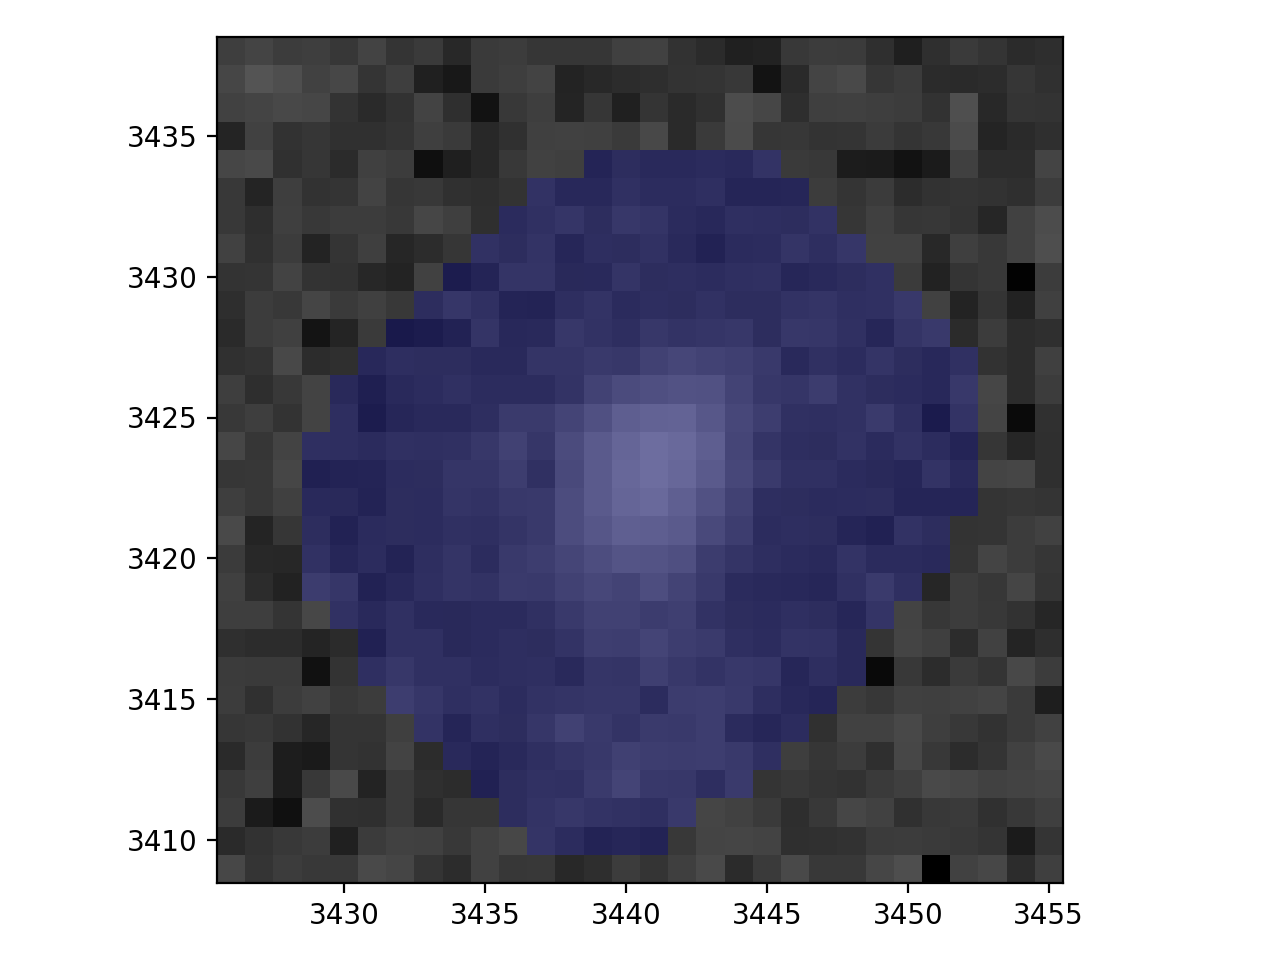

<IPython.core.display.Javascript object>


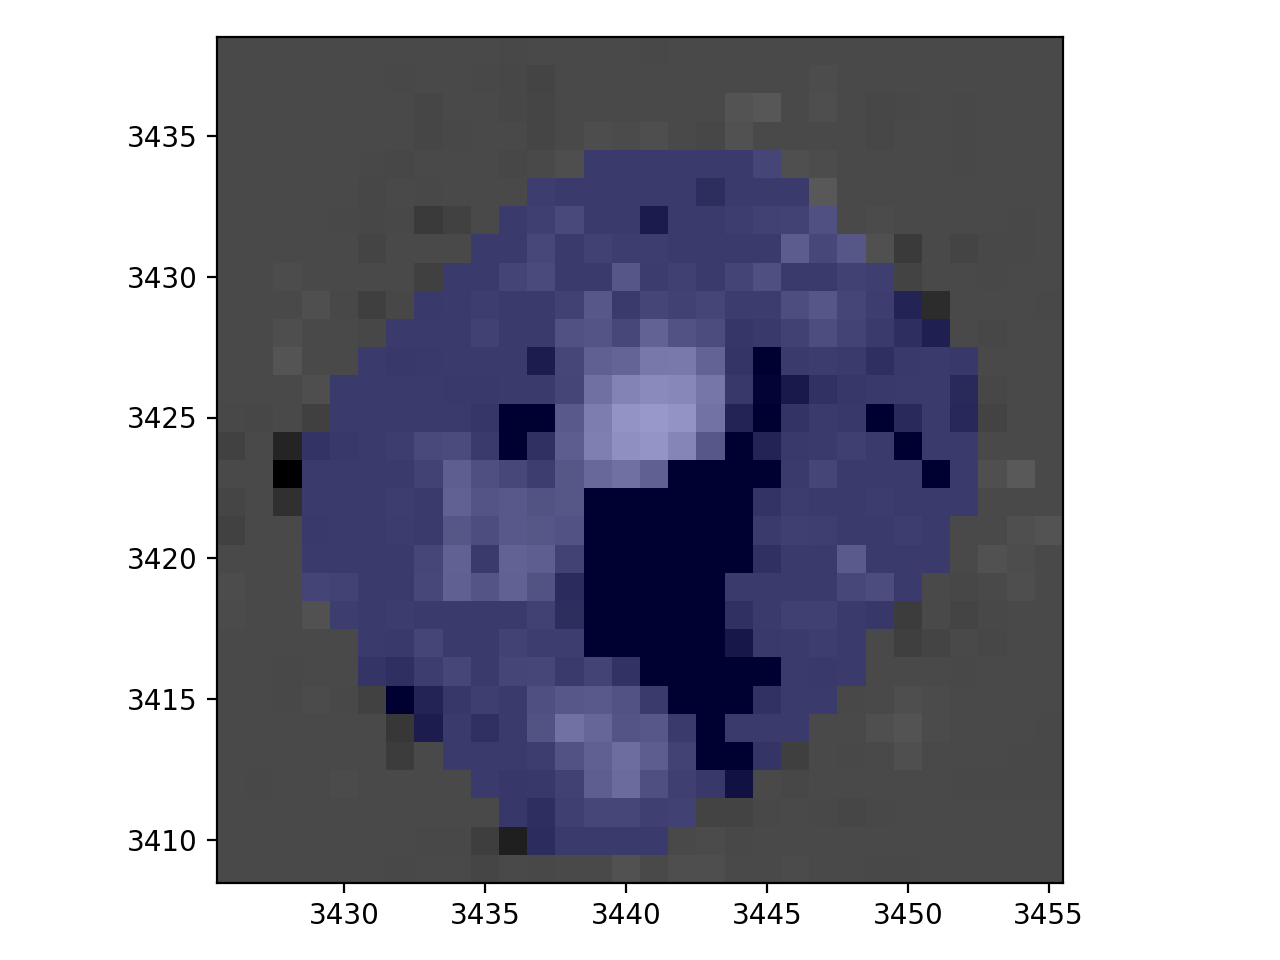

<IPython.core.display.Javascript object>


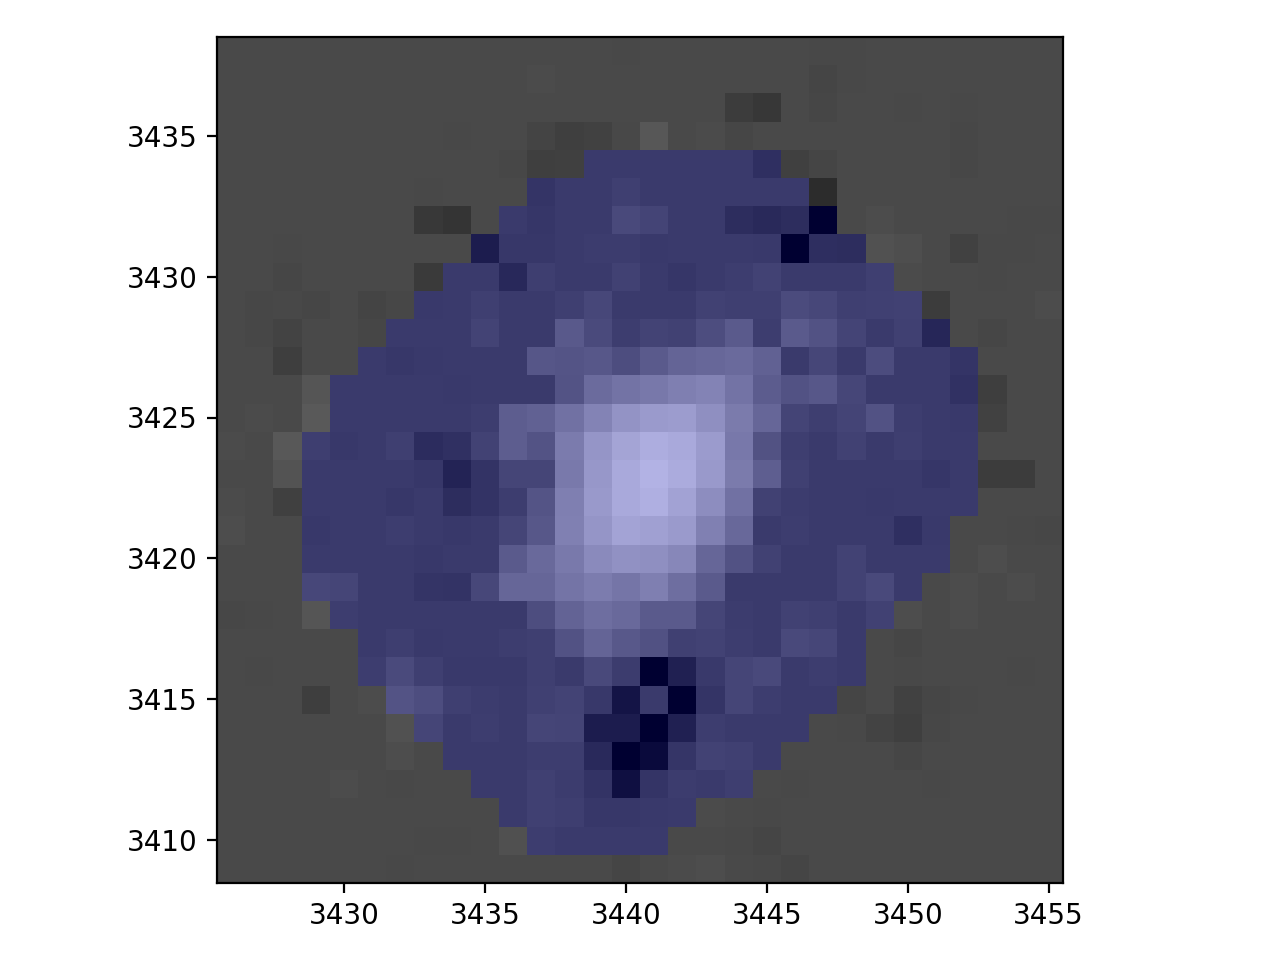

<IPython.core.display.Javascript object>


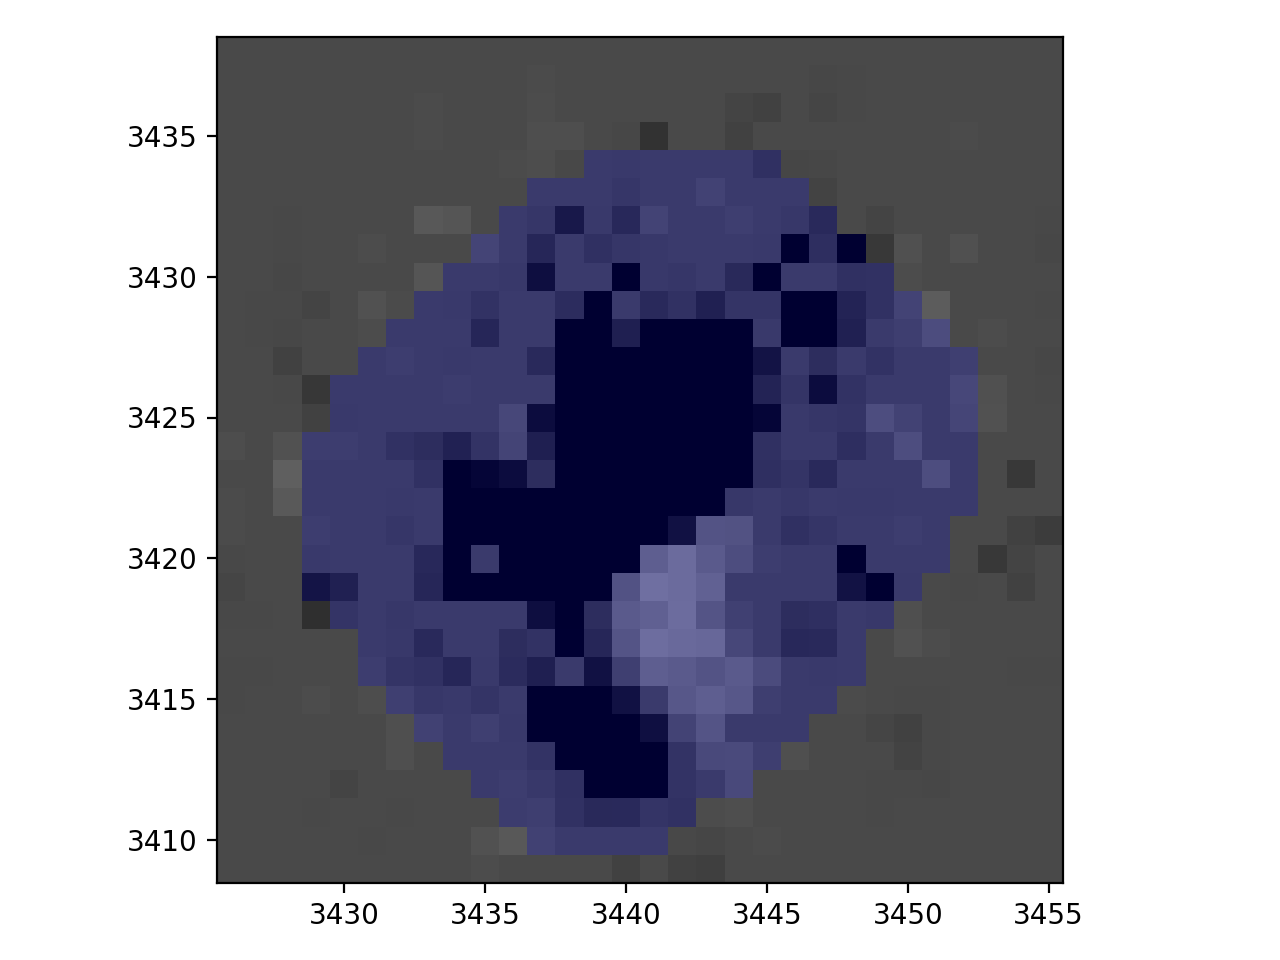

In [28]:
display_id = 5
ind = 110
plot_spectrum(sim, filterInfo, meas_cats, ind, use_throughput=False, window=display_id)
ra = meas_cats[0][ind].getCoord().getLongitude().asDegrees()
dec = meas_cats[0][ind].getCoord().getLatitude().asDegrees()
centerSource = lsst.geom.SpherePoint(ra, dec, lsst.geom.degrees)
size = lsst.geom.Extent2I(30, 30)
cutout0 = templateCoadd.getCutout(centerSource, size)
disp1 = afwDisplay.Display(display_id + 1)
disp1.setMaskTransparency(80)
disp1.scale('asinh', 'zscale', Q=8)
disp1.mtv(cutout0)
cutout0.maskedImage /= numDcrSubfilters

cutout = dcrCoadds[0].getCutout(centerSource, size)
cutout.maskedImage -= cutout0.maskedImage
disp2 = afwDisplay.Display(display_id + 2)
disp2.setMaskTransparency(80)
disp2.scale('asinh', 'zscale', Q=8)
disp2.mtv(cutout)

cutout = dcrCoadds[1].getCutout(centerSource, size)
cutout.maskedImage -= cutout0.maskedImage
disp3 = afwDisplay.Display(display_id + 3)
disp3.setMaskTransparency(80)
disp3.scale('asinh', 'zscale', Q=8)
disp3.mtv(cutout)

cutout = dcrCoadds[2].getCutout(centerSource, size)
cutout.maskedImage -= cutout0.maskedImage
disp4 = afwDisplay.Display(display_id + 4)
disp4.setMaskTransparency(80)
disp4.scale('asinh', 'zscale', Q=8)
disp4.mtv(cutout)

RA: 138.035746, Dec: -1.325790
meas coordinates: 138.035746, -1.325790
meas x,y: 3298.764365, 3774.450775
[10.8888384  15.97820513 18.27980322]


<IPython.core.display.Javascript object>


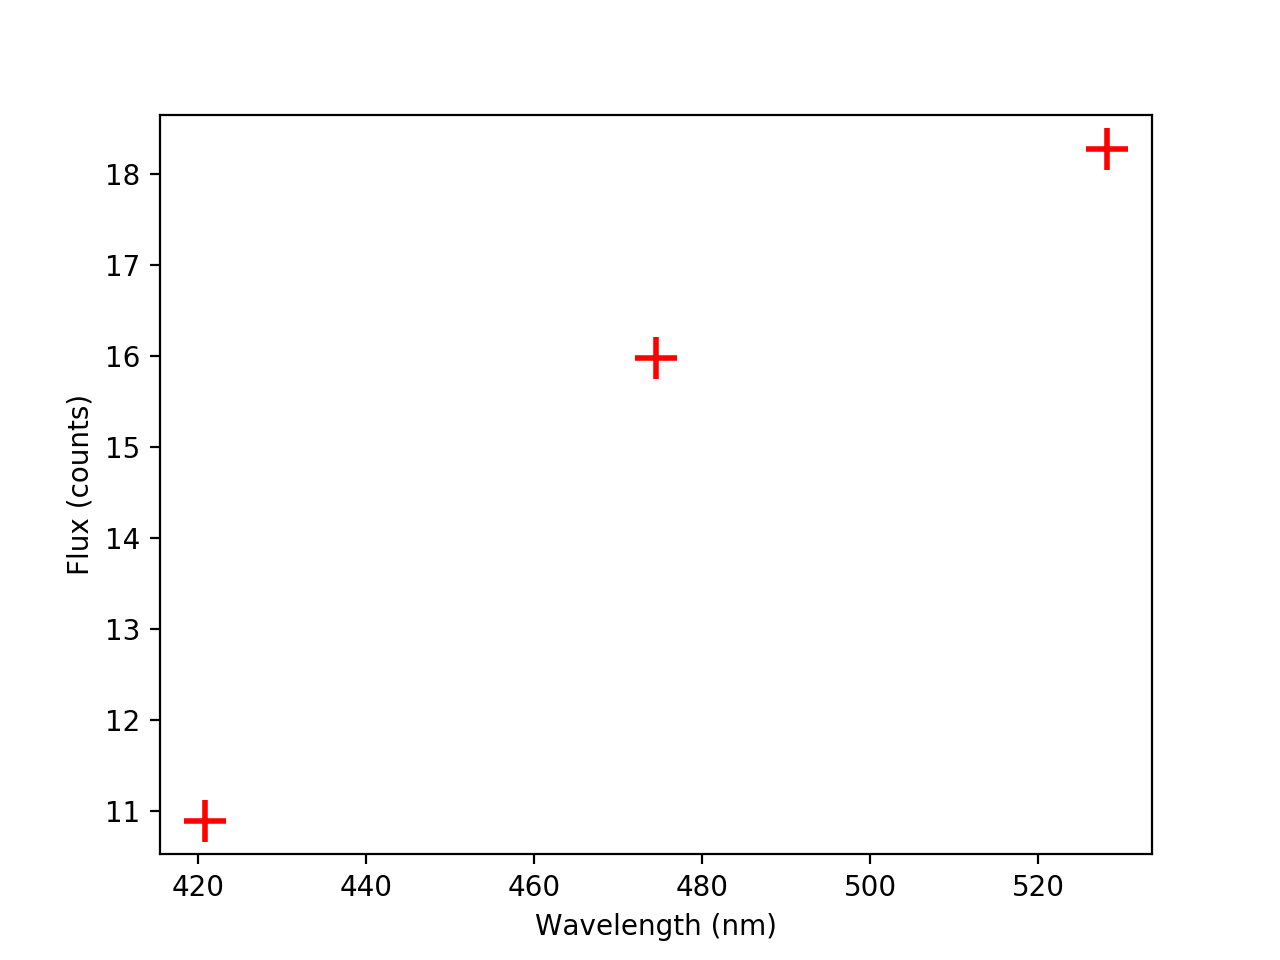

<IPython.core.display.Javascript object>


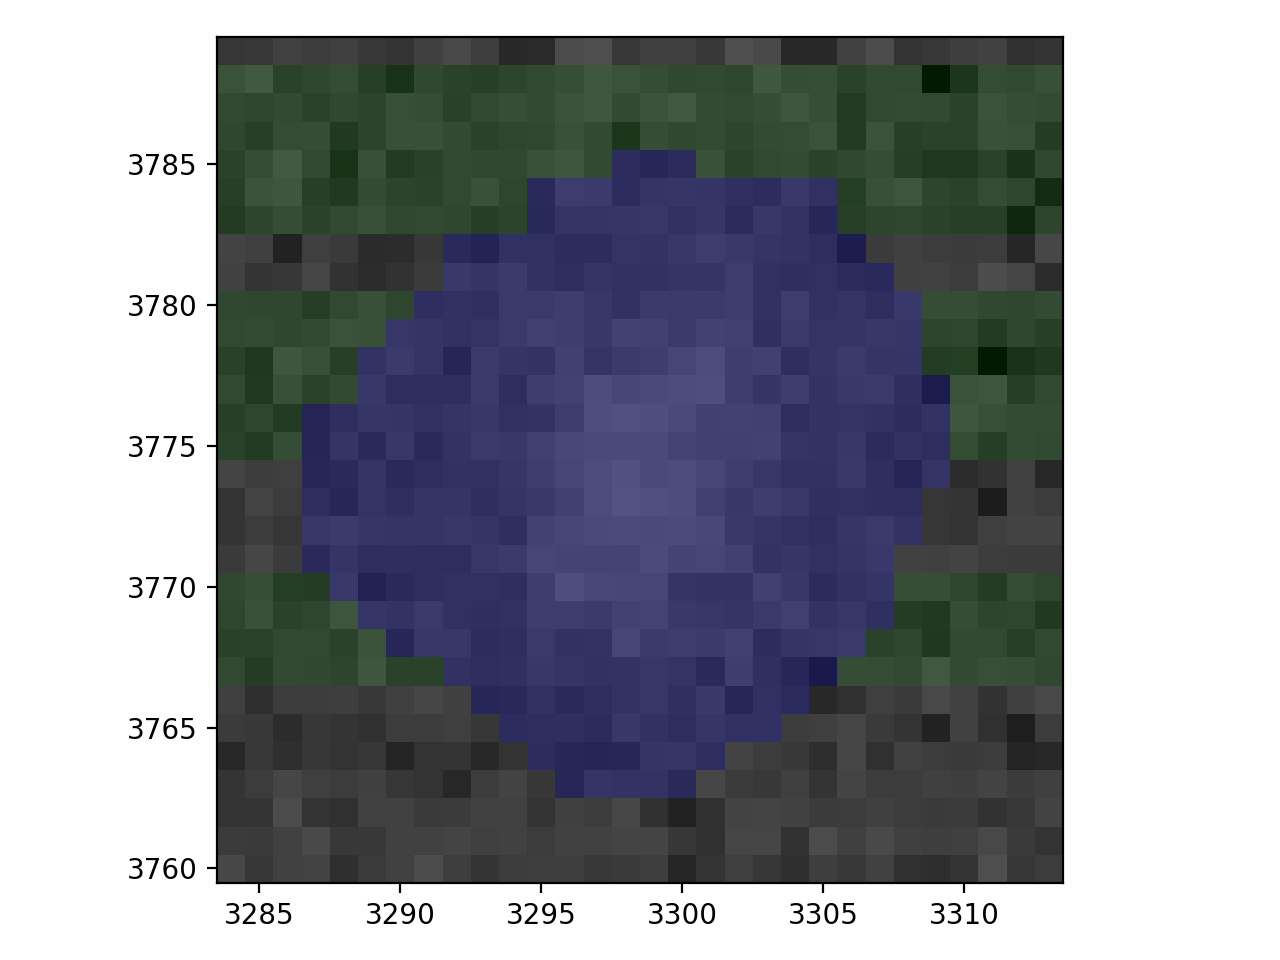

<IPython.core.display.Javascript object>


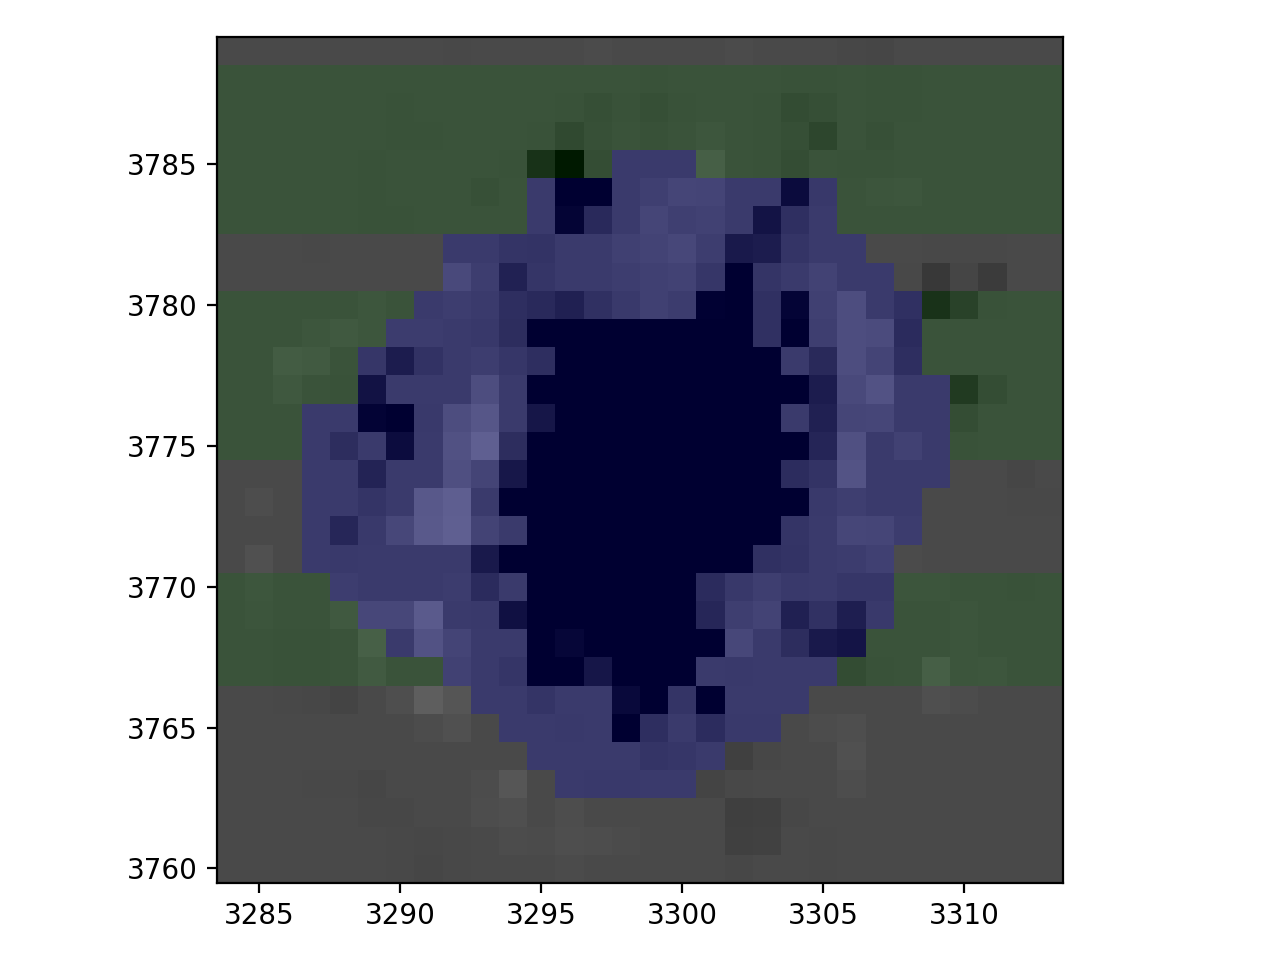

<IPython.core.display.Javascript object>


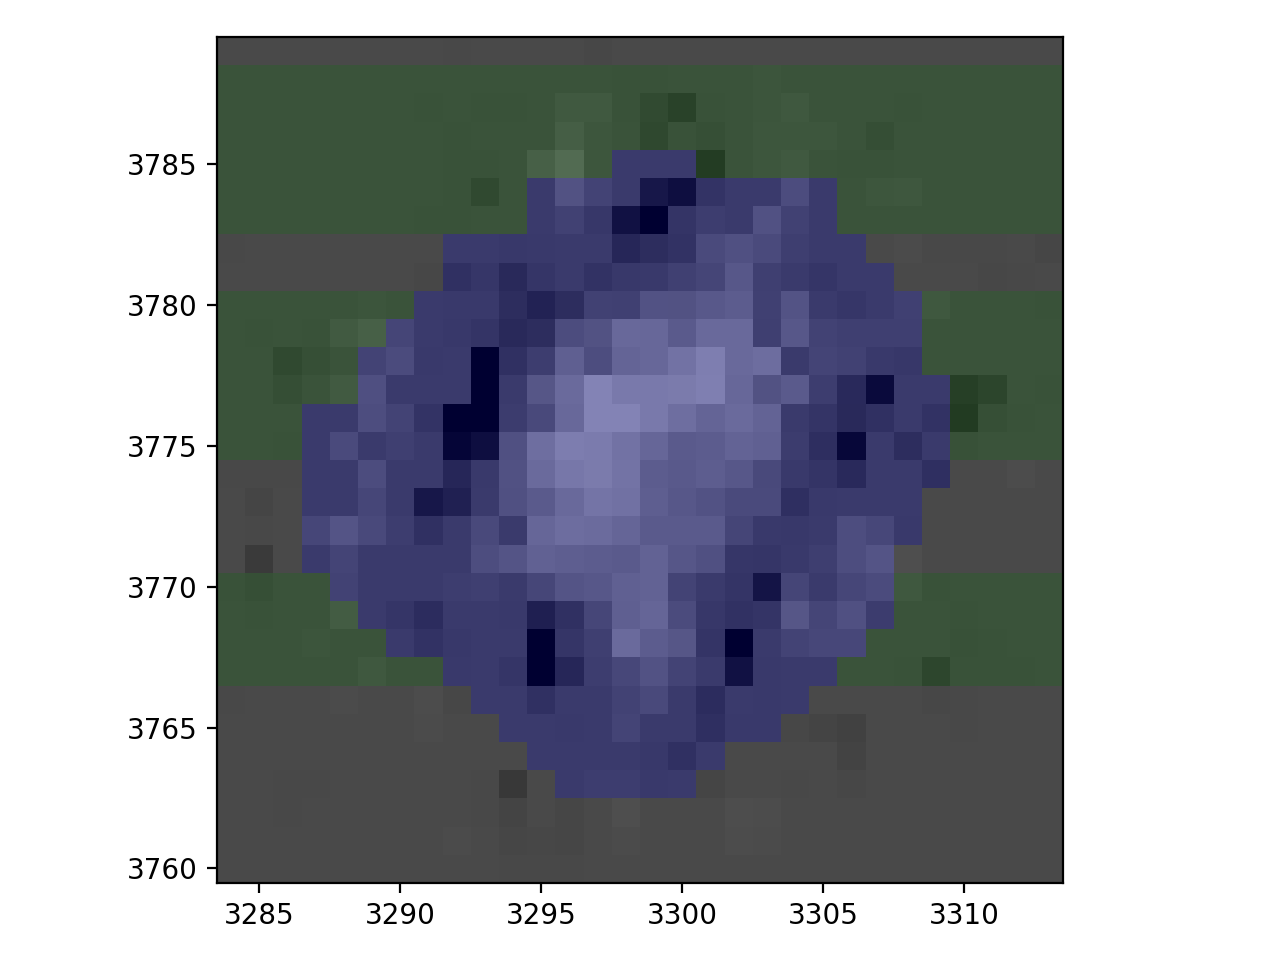

<IPython.core.display.Javascript object>


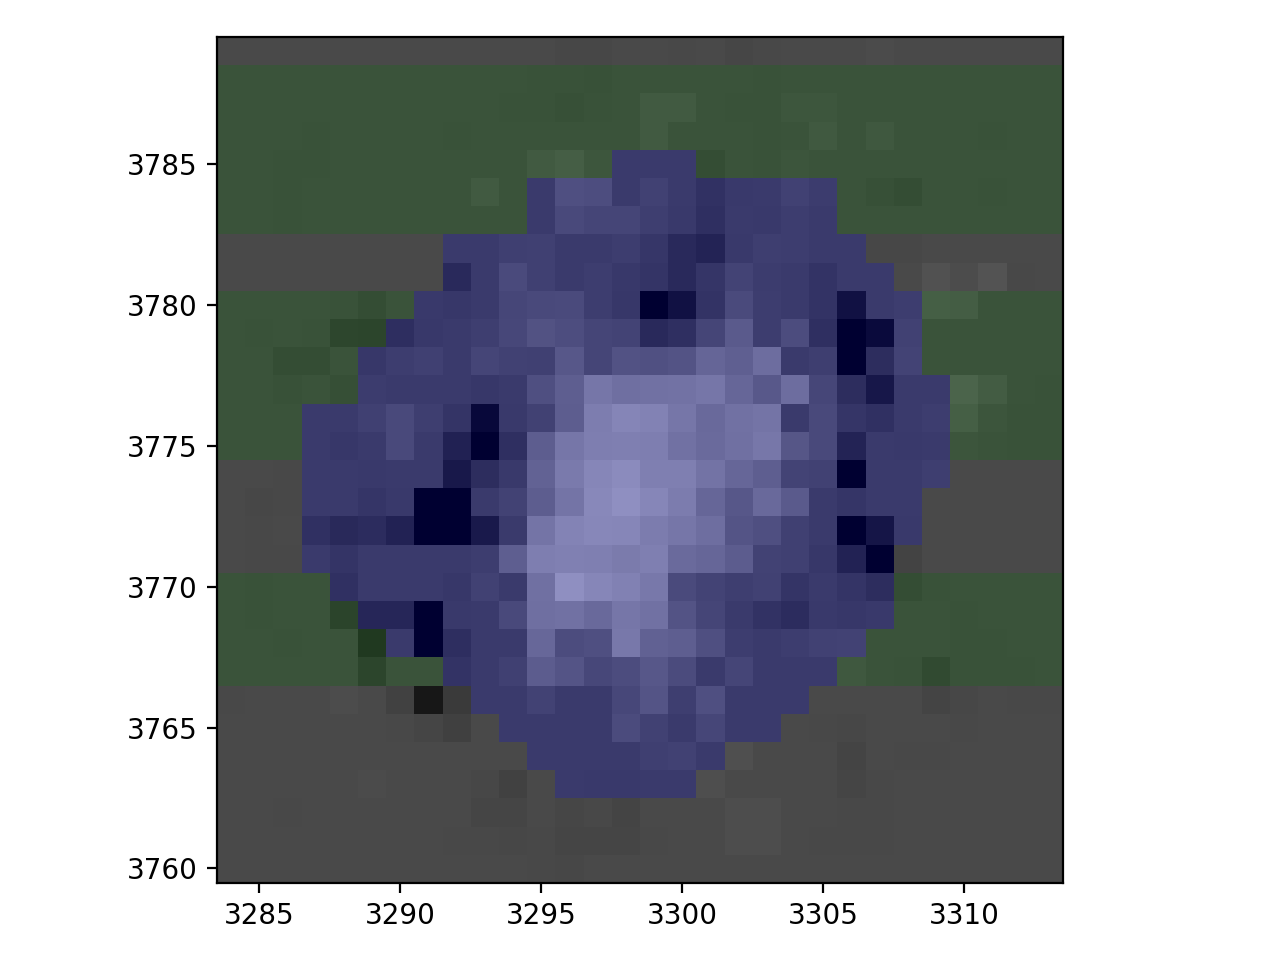

In [29]:
display_id = 10
ind = find_location(meas_cats[0], x=3300, y=3774)
plot_spectrum(sim, filterInfo, meas_cats, ind, use_throughput=False, window=display_id)
ra = meas_cats[0][ind].getCoord().getLongitude().asDegrees()
dec = meas_cats[0][ind].getCoord().getLatitude().asDegrees()
centerSource = lsst.geom.SpherePoint(ra, dec, lsst.geom.degrees)
size = lsst.geom.Extent2I(30, 30)
cutout0 = templateCoadd.getCutout(centerSource, size)
disp1 = afwDisplay.Display(display_id + 1)
disp1.setMaskTransparency(80)
disp1.scale('asinh', 'zscale', Q=8)
disp1.mtv(cutout0)
cutout0.maskedImage /= numDcrSubfilters

cutout = dcrCoadds[0].getCutout(centerSource, size)
cutout.maskedImage -= cutout0.maskedImage
disp2 = afwDisplay.Display(display_id + 2)
disp2.setMaskTransparency(80)
disp2.scale('asinh', 'zscale', Q=8)
disp2.mtv(cutout)

cutout = dcrCoadds[1].getCutout(centerSource, size)
cutout.maskedImage -= cutout0.maskedImage
disp3 = afwDisplay.Display(display_id + 3)
disp3.setMaskTransparency(80)
disp3.scale('asinh', 'zscale', Q=8)
disp3.mtv(cutout)

cutout = dcrCoadds[2].getCutout(centerSource, size)
cutout.maskedImage -= cutout0.maskedImage
disp4 = afwDisplay.Display(display_id + 4)
disp4.setMaskTransparency(80)
disp4.scale('asinh', 'zscale', Q=8)
disp4.mtv(cutout)